In [ ]:
!pip install -q polyglot

     |████████████████████████████████| 126 kB 4.7 MB/s 


In [ ]:
!pip install -q pyicu
!pip install -q pycld2

!pip install -q textstat
!pip install -q googletrans

     |████████████████████████████████| 304 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41.4 MB 18.0 MB/s 
ERROR: Operation cancelled by user
     |████████████████████████████████| 105 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 45.8 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 1.3 MB 10.8 MB/s 
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
#!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
#import textstat
from scipy import stats
#from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob

from sklearn.metrics import roc_auc_score, roc_curve

import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error


from nltk.corpus import wordnet
from nltk.corpus import stopwords
#from googletrans import Translator
from nltk import WordNetLemmatizer
#from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)

In [ ]:
!pip install transformers 

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 6.5 MB 30.0 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 895 kB 47.8 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Loading the training, validation, and testing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
val_data = pd.read_csv("/content/gdrive/MyDrive/capstone project/cap project data2/validation.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/capstone project/cap project data2/test.csv")
train_data = pd.read_csv("/content/gdrive/MyDrive/capstone project/cap project data2/jigsaw-toxic-comment-train.csv")
train_label=pd.read_csv("/content/gdrive/MyDrive/capstone project/test_labels.csv")

In [ ]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
val_data.head()

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


In [ ]:
test_data.head()

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [ ]:
train_label.head()

,id,toxic
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [ ]:
y_test=train_label[['toxic']]

word cloud



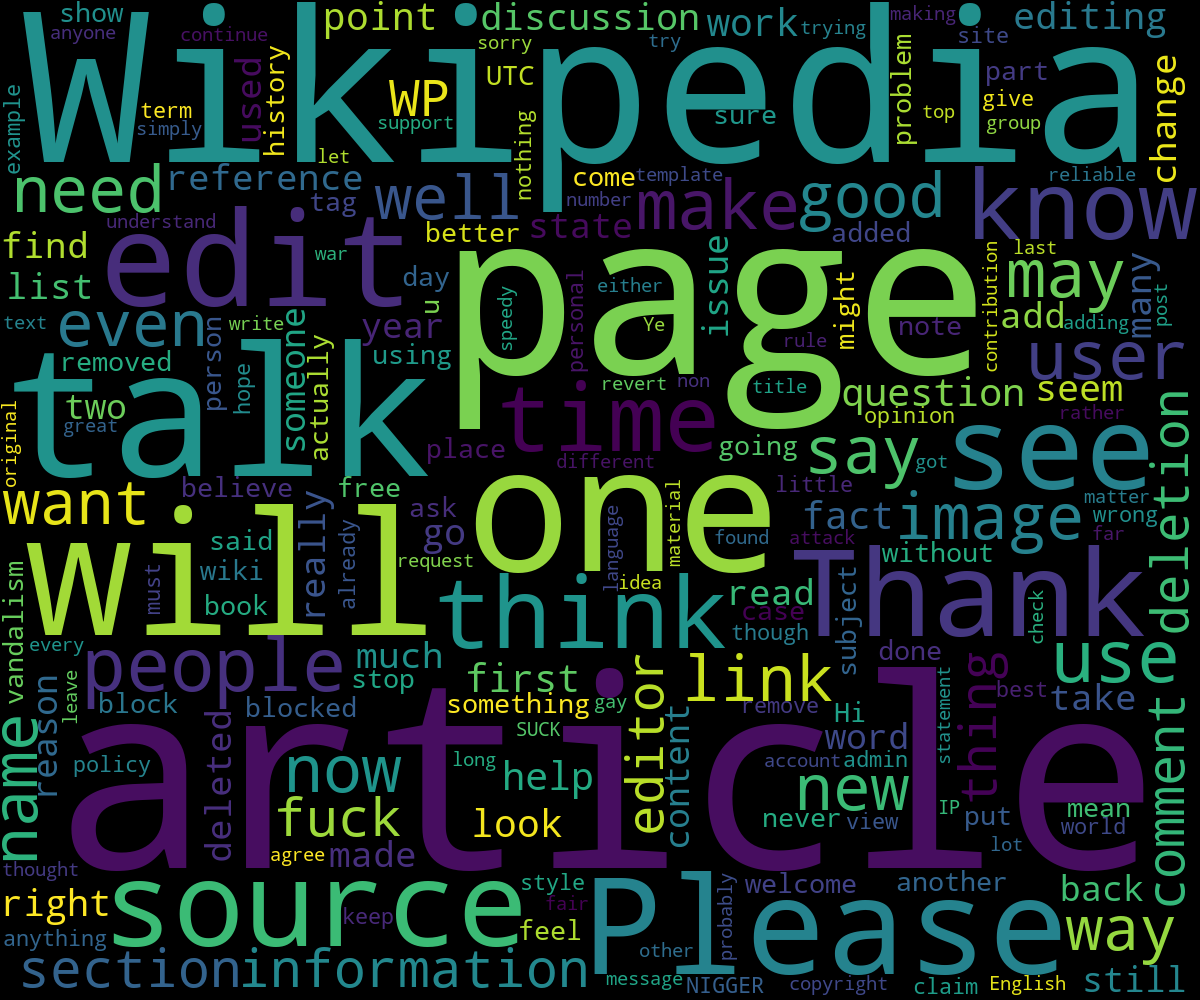

In [ ]:
def nonan(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

text = ' '.join([nonan(abstract) for abstract in train_data["comment_text"]])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
fig = px.imshow(wordcloud)
fig.update_layout(title_text='Common words in comments')

number of words present in the comments.
 frequency vs word count
 

In [ ]:
def new_len(x):
    if type(x) is str:
        return len(x.split())
    else:
        return 0

train_data["comment_words"] = train_data["comment_text"].apply(new_len)
nums = train_data.query("comment_words != 0 and comment_words < 200").sample(frac=0.1)["comment_words"]
fig = ff.create_distplot(hist_data=[nums],
                         group_labels=["All comments"],
                         colors=["coral"])

fig.update_layout(title_text="Comment words", xaxis_title="Comment words", template="simple_white", showlegend=False)
fig.show()

sentiment


In [ ]:

nltk.downloader.download('vader_lexicon')
def polarity(x):
    if type(x) == str:
        return SIA.polarity_scores(x)
    else:
        return 1000
    
SIA = SentimentIntensityAnalyzer()
train_data["polarity"] = train_data["comment_text"].progress_apply(polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


100%|██████████| 223549/223549 [03:12<00:00, 1159.28it/s]


In [ ]:
fig = go.Figure(go.Histogram(x=[pols["neg"] for pols in train_data["polarity"] if pols["neg"] != 0], marker=dict(
            color='seagreen')
    ))

fig.update_layout(xaxis_title="Negativity sentiment", title_text="Negativity sentiment", template="simple_white")
fig.show()

most comments are non negative fromthe above graph

Pie chart of targets

In [ ]:
fig = go.Figure(data=[
    go.Pie(labels=train_data.columns[2:7],
           values=train_data.iloc[:, 2:7].sum().values, marker=dict(colors=px.colors.qualitative.Plotly))
])
fig.update_traces(textposition='outside', textfont=dict(color="black"))
fig.update_layout(title_text="Pie chart of labels")
fig.show()

perping data


In [ ]:
val = val_data
train = train_data

def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

val["comment_text"] = clean(val["comment_text"])
test_data["content"] = clean(test_data["content"])
train["comment_text"] = clean(train["comment_text"])

Define ROC-AUC evaluation metric

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

tokenize comments/ encode

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)


In [ ]:

# #IMP DATA FOR CONFIG

# AUTO = tf.data.experimental.AUTOTUNE


# # Configuration
# EPOCHS = 3
# BATCH_SIZE = 16 * strategy.num_replicas_in_sync
# #MAX_LEN = 192


NameError: ignored

In [ ]:


AUTO = tf.data.experimental.AUTOTUNE

tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)



EPOCHS = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync



INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.105.46.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.105.46.98:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from tokenizers import BertWordPieceTokenizer

# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [ ]:
MAX_LEN = 512


x_train = fast_encode(train.comment_text.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_valid = fast_encode(val_data.comment_text.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_test = fast_encode(test_data.content.astype(str), fast_tokenizer, maxlen=MAX_LEN)

y_valid = val.toxic.values
y_train = train.toxic.values

100%|██████████| 250/250 [00:15<00:00, 15.76it/s]


Define training, validation, and testing datasets

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)


Define VNN model

In [ ]:
def build_vnn_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    
    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)
    
    conc = K.sum(embedding, axis=2)
    conc = Dense(128, activation='relu')(conc)
    conc = Dense(64, activation='relu')(conc)
    conc = Dense(1, activation='sigmoid')(conc)
    
    model = Model(inputs=input_word_ids, outputs=conc)
    
    model.compile(Adam(lr=0.01), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [ ]:
with strategy.scope():
    transformer_layer = transformers.TFDistilBertModel.\
    from_pretrained('distilbert-base-multilingual-cased')
    model_vnn = build_vnn_model(transformer_layer, max_len=512)

model_vnn.summary()

Downloading:   0%|          | 0.00/869M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 embedding (Embedding)       (None, 512, 768)          91812096  
                                                                 
 tf.math.reduce_sum (TFOpLam  (None, 512)              0         
 bda)                                                            
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 91,877,889
Trainable params: 65,793
Non-trainable params: 91,812,096
____________________________________________

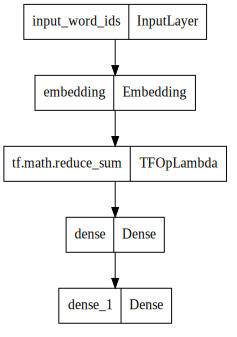

In [ ]:


SVG(tf.keras.utils.model_to_dot(model_vnn, dpi=70).create(prog='dot', format='svg'))



Define ReduceLROnPlateau callback

In [ ]:
def callback():
    cb = []

    reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.3, patience=3, 
                                    verbose=1, mode='auto', 
                                    epsilon=0.0001, cooldown=1, min_lr=0.000001)
    cb.append(reduceLROnPlat)
    log = CSVLogger('log.csv')
    cb.append(log)

    RocAuc = RocAucEvaluation(validation_data=(x_valid, y_valid), interval=1)
    cb.append(RocAuc)
    
    return cb

Train the model

In [ ]:
N_STEPS = x_train.shape[0] // BATCH_SIZE
calls = callback()

train_history = model_vnn.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=12
)

Epoch 1/12
   5/1746 [..............................] - ETA: 27s - loss: 25.2412 - accuracy: 0.8391   WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0025s vs `on_train_batch_end` time: 0.1299s). Check your callbacks.


1746/1746 [==============================] - ETA: 0s - loss: 0.5219 - accuracy: 0.8992
 ROC-AUC - epoch: 1 - score: 0.489082
1746/1746 [==============================] - 36s 19ms/step - loss: 0.5219 - accuracy: 0.8992 - val_loss: 0.4401 - val_accuracy: 0.8463 - lr: 0.0100
Epoch 2/12
1745/1746 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.9043
 ROC-AUC - epoch: 2 - score: 0.490082
1746/1746 [==============================] - 32s 18ms/step - loss: 0.3109 - accuracy: 0.9043 - val_loss: 0.4492 - val_accuracy: 0.8463 - lr: 0.0100
Epoch 3/12
1744/1746 [============================>.] - ETA: 0s - loss: 0.3110 - accuracy: 0.9044
 ROC-AUC - epoch: 3 - score: 0.493830
1746/1746 [==============================] - 40s 23ms/step - loss: 0.3110 - accuracy: 0.9044 - val_loss: 0.4603 - val_accuracy: 0.8463 - lr: 0.0100
Epoch 4/12
1744/1746 [============================>.] - ETA: 0s - loss: 0.3172 - accuracy: 0.9038
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.002999

In [ ]:

predictions_vnn = model_vnn.predict(test_dataset)
print(mean_absolute_error(y_test,predictions_vnn))
print(np.sqrt(mean_squared_error(y_test,predictions_vnn)))

0.2781186570074053
0.4379668283874453


In [ ]:
auc_vnn = roc_auc_score(y_test, predictions_vnn)
print(auc_vnn)

0.50010843638564


Define CNN model

In [ ]:
def build_cnn_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    
    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)
    
    embedding = SpatialDropout1D(0.3)(embedding)
    conv_1 = Conv1D(64, 2)(embedding)
    conv_2 = Conv1D(64, 3)(embedding)
    conv_3 = Conv1D(64, 4)(embedding)
    conv_4 = Conv1D(64, 5)(embedding)
    
    maxpool_1 = GlobalAveragePooling1D()(conv_1)
    maxpool_2 = GlobalAveragePooling1D()(conv_2)
    maxpool_3 = GlobalAveragePooling1D()(conv_3)
    maxpool_4 = GlobalAveragePooling1D()(conv_4)
    conc = concatenate([maxpool_1, maxpool_2, maxpool_3, maxpool_4], axis=1)

    conc = Dense(64, activation='relu')(conc)
    conc = Dense(1, activation='sigmoid')(conc)
    
    model = Model(inputs=input_word_ids, outputs=conc)
    
    model.compile(Adam(lr=0.01), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

Build model and check summary

In [ ]:
with strategy.scope():
    model_cnn = build_cnn_model(transformer_layer, max_len=512)

model_cnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 512, 768)     91812096    ['input_word_ids[0][0]']         
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 512, 768)    0           ['embedding_1[0][0]']            
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 511, 64)      98368       ['spatial_dropout1d[0][0]']

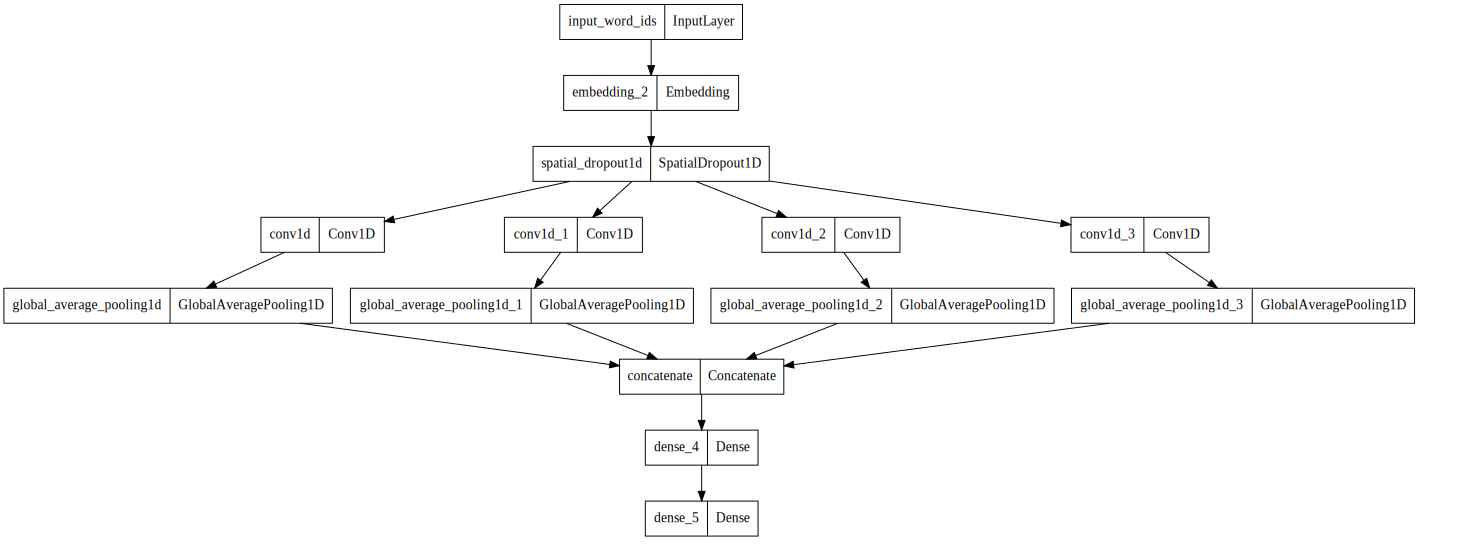

In [ ]:
SVG(tf.keras.utils.model_to_dot(model_cnn, dpi=70).create(prog='dot', format='svg'))

In [ ]:
train_history = model_cnn.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=5
)

Epoch 1/5
   4/1746 [..............................] - ETA: 36s - loss: 0.7276 - accuracy: 0.8145    WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_train_batch_end` time: 0.4799s). Check your callbacks.


1745/1746 [============================>.] - ETA: 0s - loss: 0.3050 - accuracy: 0.9046
 ROC-AUC - epoch: 1 - score: 0.560968
1746/1746 [==============================] - 61s 30ms/step - loss: 0.3049 - accuracy: 0.9046 - val_loss: 0.4266 - val_accuracy: 0.8461 - lr: 0.0100
Epoch 2/5
1745/1746 [============================>.] - ETA: 0s - loss: 0.3199 - accuracy: 0.9038
 ROC-AUC - epoch: 2 - score: 0.500000
1746/1746 [==============================] - 40s 23ms/step - loss: 0.3199 - accuracy: 0.9037 - val_loss: 0.4478 - val_accuracy: 0.8463 - lr: 0.0100
Epoch 3/5
1745/1746 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.9045
 ROC-AUC - epoch: 3 - score: 0.500000
1746/1746 [==============================] - 39s 22ms/step - loss: 0.3161 - accuracy: 0.9044 - val_loss: 0.4480 - val_accuracy: 0.8463 - lr: 0.0100
Epoch 4/5
1746/1746 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.9046
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.002999999

In [ ]:
predictions_cnn = model_cnn.predict(test_dataset)
print(mean_absolute_error(y_test,predictions_cnn))
print(np.sqrt(mean_squared_error(y_test,predictions_cnn)))

0.27795505425791484
0.4380858687097331


In [ ]:
auc_cnn = roc_auc_score(y_test, predictions_cnn)
print(auc_cnn)

0.5


LSTM with Attention

In [ ]:
class AttentionWeightedAverage(Layer):

    def __init__(self, return_attention=False, **kwargs):
        self.init = initializers.get('uniform')
        self.supports_masking = True
        self.return_attention = return_attention
        super(AttentionWeightedAverage, self).__init__(** kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(ndim=3)]
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[2], 1),
                                 name='{}_W'.format(self.name),
                                 initializer=self.init)
        super(AttentionWeightedAverage, self).build(input_shape)

    def call(self, x, mask=None):
        logits = K.dot(x, self.W)
        x_shape = K.shape(x)
        logits = K.reshape(logits, (x_shape[0], x_shape[1]))
        ai = K.exp(logits - K.max(logits, axis=-1, keepdims=True))

        if mask is not None:
            mask = K.cast(mask, K.floatx())
            ai = ai * mask
        att_weights = ai / (K.sum(ai, axis=1, keepdims=True) + K.epsilon())
        weighted_input = x * K.expand_dims(att_weights)
        result = K.sum(weighted_input, axis=1)
        if self.return_attention:
            return [result, att_weights]
        return result

    def get_output_shape_for(self, input_shape):
        return self.compute_output_shape(input_shape)

    def compute_output_shape(self, input_shape):
        output_len = input_shape[2]
        if self.return_attention:
            return [(input_shape[0], output_len), (input_shape[0], input_shape[1])]
        return (input_shape[0], output_len)

    def compute_mask(self, input, input_mask=None):
        if isinstance(input_mask, list):
            return [None] * len(input_mask)
        else:
            return None

Define the LSTM model

In [ ]:
def build_lstm_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    
    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)
    
    embedding = SpatialDropout1D(0.3)(embedding)
    lstm_1 = LSTM(128, return_sequences=True)(embedding)
    lstm_2 = LSTM(128, return_sequences=True)(lstm_1)
    
    attention = AttentionWeightedAverage()(lstm_2)
    conc = Dense(64, activation='relu')(attention)
    conc = Dense(1, activation='sigmoid')(conc)
    
    model = Model(inputs=input_word_ids, outputs=conc)
    
    model.compile(Adam(lr=0.01), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [ ]:
with strategy.scope():
    model_lstm = build_lstm_model(transformer_layer, max_len=512)

model_lstm.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 512, 768)          91812096  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 512, 768)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 512, 128)          459264    
                                                                 
 lstm_1 (LSTM)               (None, 512, 128)          131584    
                                                                 
 attention_weighted_average   (None, 128)              128       
 (AttentionWeightedAverage)                                

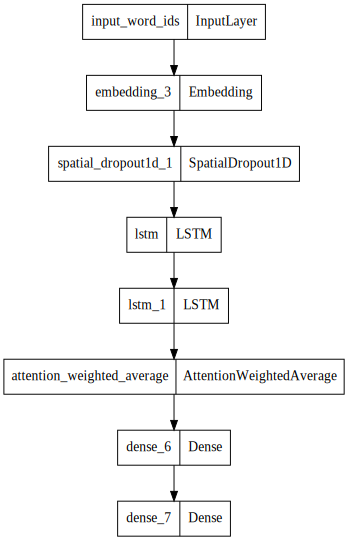

In [ ]:
SVG(tf.keras.utils.model_to_dot(model_lstm, dpi=70).create(prog='dot', format='svg'))

In [ ]:
train_history = model_lstm.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=5
)

Epoch 1/5
   6/1746 [..............................] - ETA: 3:14 - loss: 0.4577 - accuracy: 0.7708WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0031s vs `on_train_batch_end` time: 0.5890s). Check your callbacks.


1746/1746 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.9420
 ROC-AUC - epoch: 1 - score: 0.740132
1746/1746 [==============================] - 217s 120ms/step - loss: 0.1617 - accuracy: 0.9420 - val_loss: 0.4676 - val_accuracy: 0.8478 - lr: 0.0100
Epoch 2/5
1746/1746 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9601
 ROC-AUC - epoch: 2 - score: 0.729468
1746/1746 [==============================] - 202s 116ms/step - loss: 0.1032 - accuracy: 0.9601 - val_loss: 0.6801 - val_accuracy: 0.8476 - lr: 0.0100
Epoch 3/5
1746/1746 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9632
 ROC-AUC - epoch: 3 - score: 0.697342
1746/1746 [==============================] - 201s 115ms/step - loss: 0.0941 - accuracy: 0.9632 - val_loss: 0.5662 - val_accuracy: 0.8468 - lr: 0.0100
Epoch 4/5
1746/1746 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9650
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.002

In [ ]:
predictions_lstm = model_lstm.predict(test_dataset)
print(mean_absolute_error(y_test,predictions_lstm))
print(np.sqrt(mean_squared_error(y_test,predictions_lstm)))

0.22152940193592235
0.4557917467500263


In [ ]:
auc_lstm= roc_auc_score(y_test, predictions_lstm)
print(auc_lstm)

0.7027501618875982


Define the capsule layer

In [ ]:
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

class Capsule(Layer):

    def __init__(self,
                 num_capsule,
                 dim_capsule,
                 routings=3,
                 share_weights=True,
                 initializer='glorot_uniform',
                 activation=None,
                 regularizer=None,
                 constraint=None,
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights

        self.activation = activations.get(activation)
        self.regularizer = regularizers.get(regularizer)
        self.initializer = initializers.get(initializer)
        self.constraint = constraints.get(constraint)

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(1,
                                            input_dim_capsule,
                                            self.num_capsule *
                                            self.dim_capsule),
                                     initializer=self.initializer,
                                     regularizer=self.regularizer,
                                     constraint=self.constraint,
                                     trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(input_num_capsule,
                                            input_dim_capsule,
                                            self.num_capsule *
                                            self.dim_capsule),
                                     initializer=self.initializer,
                                     regularizer=self.regularizer,
                                     constraint=self.constraint,
                                     trainable=True)

        self.build = True

    def call(self, inputs):
        if self.share_weights:
            u_hat_vectors = K.conv1d(inputs, self.W)
        else:
            u_hat_vectors = K.local_conv1d(inputs, self.W, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        u_hat_vectors = K.reshape(u_hat_vectors, (batch_size,
                                                  input_num_capsule,
                                                  self.num_capsule,
                                                  self.dim_capsule))

        u_hat_vectors = K.permute_dimensions(u_hat_vectors, (0, 2, 1, 3))
        routing_weights = K.zeros_like(u_hat_vectors[:, :, :, 0])

        for i in range(self.routings):
            capsule_weights = K.softmax(routing_weights, 1)
            outputs = K.batch_dot(capsule_weights, u_hat_vectors, [2, 2])
            if K.ndim(outputs) == 4:
                outputs = K.sum(outputs, axis=1)
            if i < self.routings - 1:
                outputs = K.l2_normalize(outputs, -1)
                routing_weights = K.batch_dot(outputs, u_hat_vectors, [2, 3])
                if K.ndim(routing_weights) == 4:
                    routing_weights = K.sum(routing_weights, axis=1)

        return self.activation(outputs)

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)

define the model

In [ ]:
def build_capsule_model(transformer, max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    
    embed = transformer.weights[0].numpy()
    embedding = Embedding(np.shape(embed)[0], np.shape(embed)[1],
                          input_length=max_len, weights=[embed],
                          trainable=False)(input_word_ids)
    
    embedding = SpatialDropout1D(0.3)(embedding)
    capsule = Capsule(num_capsule=5, dim_capsule=5,
                      routings=4, activation=squash)(embedding)

    capsule = Flatten()(capsule)
    output = Dense(128, activation='relu')(capsule)
    output = Dense(1, activation='sigmoid')(output)
    
    model = Model(inputs=input_word_ids, outputs=output)
    
    model.compile(Adam(lr=1.5e-5), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

Build the model and check summary

In [ ]:
with strategy.scope():
    model_capsule = build_capsule_model(transformer_layer, max_len=512)

model_capsule.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 512, 768)          91812096  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 512, 768)         0         
 lDropout1D)                                                     
                                                                 
 capsule (Capsule)           (None, 5, 5)              19200     
                                                                 
 flatten (Flatten)           (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               3328      
                                                           

Train the model

In [ ]:
train_history = model_capsule.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=10
)

Epoch 1/10
   6/1746 [..............................] - ETA: 40s - loss: 0.3422 - accuracy: 0.8906WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0041s vs `on_train_batch_end` time: 0.0160s). Check your callbacks.


1746/1746 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.9044
 ROC-AUC - epoch: 1 - score: 0.566088
1746/1746 [==============================] - 34s 19ms/step - loss: 0.3086 - accuracy: 0.9044 - val_loss: 0.4592 - val_accuracy: 0.8463 - lr: 1.5000e-05
Epoch 2/10
1746/1746 [==============================] - ETA: 0s - loss: 0.3068 - accuracy: 0.9045
 ROC-AUC - epoch: 2 - score: 0.570758
1746/1746 [==============================] - 37s 21ms/step - loss: 0.3068 - accuracy: 0.9045 - val_loss: 0.4589 - val_accuracy: 0.8463 - lr: 1.5000e-05
Epoch 3/10
1745/1746 [============================>.] - ETA: 0s - loss: 0.3051 - accuracy: 0.9046
 ROC-AUC - epoch: 3 - score: 0.573834
1746/1746 [==============================] - 43s 25ms/step - loss: 0.3051 - accuracy: 0.9046 - val_loss: 0.4643 - val_accuracy: 0.8463 - lr: 1.5000e-05
Epoch 4/10
1743/1746 [============================>.] - ETA: 0s - loss: 0.3034 - accuracy: 0.9049
 ROC-AUC - epoch: 4 - score: 0.574640
1746/1746 [

Visualize model architecture

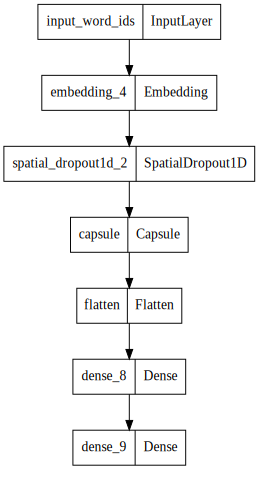

In [ ]:
SVG(tf.keras.utils.model_to_dot(model_capsule, dpi=70).create(prog='dot', format='svg'))

In [ ]:
predictions_capsule = model_capsule.predict(test_dataset)
print(mean_absolute_error(y_test,predictions_capsule))
print(np.sqrt(mean_squared_error(y_test,predictions_capsule)))

0.26505947254781687
0.44193978250405036


In [ ]:
auc_capsule= roc_auc_score(y_test, predictions_capsule)
print(auc_capsule)

0.5908055415637086


DistilBERT

Define the model

In [ ]:
def build_distilbert_model(transformer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    cls_token = Dense(500, activation="elu")(cls_token)
    cls_token = Dropout(0.1)(cls_token)
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    
    model.compile(Adam(lr=1.5e-5), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

Build the model and check summary

In [ ]:
with strategy.scope():
    model_distilbert = build_distilbert_model(transformer_layer, max_len=512)

model_distilbert.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  134734080
 tilBertModel)               idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense_8 (Dense)             (None, 500)               384500    
                                                           

training

In [ ]:
train_history = model_distilbert.fit(
    train_dataset,
    steps_per_epoch=N_STEPS,
    validation_data=valid_dataset,
    callbacks = calls,
    epochs=6
)

Epoch 1/6
   6/1746 [..............................] - ETA: 7:02 - loss: 0.4150 - accuracy: 0.8659WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0060s vs `on_train_batch_end` time: 6.0712s). Check your callbacks.


1746/1746 [==============================] - ETA: 0s - loss: 0.1190 - accuracy: 0.9536
 ROC-AUC - epoch: 1 - score: 0.815823
1746/1746 [==============================] - 502s 256ms/step - loss: 0.1190 - accuracy: 0.9536 - val_loss: 0.4509 - val_accuracy: 0.8505 - lr: 1.5000e-05
Epoch 2/6
1746/1746 [==============================] - ETA: 0s - loss: 0.0876 - accuracy: 0.9643
 ROC-AUC - epoch: 2 - score: 0.817217
1746/1746 [==============================] - 431s 247ms/step - loss: 0.0876 - accuracy: 0.9643 - val_loss: 0.5736 - val_accuracy: 0.8509 - lr: 1.5000e-05
Epoch 3/6
1746/1746 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9684
 ROC-AUC - epoch: 3 - score: 0.811133
1746/1746 [==============================] - 432s 247ms/step - loss: 0.0755 - accuracy: 0.9684 - val_loss: 0.6615 - val_accuracy: 0.8526 - lr: 1.5000e-05
Epoch 4/6
1746/1746 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9740
Epoch 4: ReduceLROnPlateau reducing learning r

network vizualization

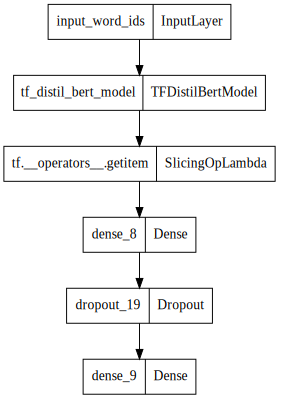

In [ ]:
SVG(tf.keras.utils.model_to_dot(model_distilbert, dpi=70).create(prog='dot', format='svg'))

In [ ]:


predictions_distill = model_distilbert.predict(test_dataset)
print(mean_absolute_error(y_test,predictions_distill))
print(np.sqrt(mean_squared_error(y_test,predictions_distill)))


0.2151631984544691
0.4557181492114705


In [ ]:
auc_distill = roc_auc_score(y_test, predictions_distill)
print(auc_distill)

0.7218375722285306


In [ ]:
print(predictions_distill)

[[2.0861626e-07]
 [1.6391277e-06]
 [8.4397197e-04]
 ...
 [4.6789646e-06]
 [9.5367432e-07]
 [1.4603138e-06]]
